<a href="https://colab.research.google.com/github/DaraSamii/RL_pracitce/blob/master/ActorCritic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Drive

In [6]:
from google.colab import drive

drive.mount('/content/drive')

%cd /content/drive/MyDrive/programming/RL

pwd = %pwd
pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/programming/RL


'/content/drive/MyDrive/programming/RL'

# Imports

In [26]:
import torch as T
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
import matplotlib.pyplot as plt


In [ ]:
sorted(list(map(lambda x: x.id , list(gym.envs.registry.all()))))

In [13]:
env = gym.make('CartPole-v1')
state = env.reset()
print(state)

[ 0.00171004  0.03860411 -0.0272402  -0.02529075]


In [126]:
class GenericNetwork(nn.Module):
    def __init__(self, lr, input_dims, fc1_dim, fc2_dim, n_actions):
        super(GenericNetwork, self).__init__()

        self.input_dims = input_dims
        self.fc1_dim = fc1_dim
        self.fc2_dim = fc2_dim
        self.n_actions = n_actions
        self.lr = lr
        self.fc1 = nn.Linear(self.input_dims, self.fc1_dim)
        self.fc2 = nn.Linear(self.fc1_dim, self.fc2_dim)
        self.fc3 = nn.Linear(self.fc2_dim, self.n_actions)
        self.optimizer = optim.Adam(self.parameters(),lr=self.lr)

        self.device = T.device('cuda:0')
        self.to(self.device)
    
    def forward(self, observation):
        state = T.Tensor(observation).to(self.device)

        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [127]:
class Agent(object):
    def __init__(self, alpha, beta, input_dims, n_actions, gamma=0.99, l1_size=256, l2_size=256):
        self.alpha = alpha
        self.beta = beta
        self.input_dims = input_dims
        self.l1_size = l1_size
        self.l2_size = l2_size
        self.n_actions = n_actions
        self.gamma = gamma 

        self.log_probs = None
        self.actor = GenericNetwork(alpha, input_dims, l1_size, l2_size, n_actions)
        self.critic = GenericNetwork(beta, input_dims, l1_size, l2_size, n_actions =1)

    def take_action(self, observation):
        probabilities = F.softmax(self.actor.forward(observation))
        action_probs = T.distributions.Categorical(probabilities)
        action = action_probs.sample()
        self.log_probs = action_probs.log_prob(action)
        return action.item()

    def learn(self, state, action, reward, new_state, done):
        self.actor.optimizer.zero_grad()
        self.critic.optimizer.zero_grad()

        reward = T.tensor(reward, dtype=T.float).to(self.actor.device)

        critic_value = self.critic.forward(state)
        critic_new_value = self.critic.forward(new_state)
        delta = reward + self.gamma*critic_new_value * (1 - int(done)) - critic_value

        actor_loss = -self.log_probs* delta
        critic_loss = delta**2

        (actor_loss + critic_loss).backward()

        self.actor.optimizer.step()
        self.critic.optimizer.step()

In [128]:
#a = gym.wrappers.Monitor(env,pwd) # SEARCH

In [129]:
agent = Agent(alpha = 0.00001, beta=0.0005, input_dims=4, gamma=0.999, n_actions=2,l1_size=128, l2_size=128)

env = gym.make("CartPole-v1")
score_history = []

In [140]:
n_episodes = 500
for i in range(n_episodes):
    done = False
    score =0
    observation = env.reset()
    while not done:
        action = agent.take_action(observation)
        new_observation, reward, done, info = env.step(action)
        score += reward
        agent.learn(observation,action, reward, new_observation, done)
        observation =new_observation
    print('episodes : ',i, " Score : %3.2f" % score, " Mean Score : %3.2f" % np.mean(score_history[:-100:-1]))
    score_history.append(score)

plt.plot(score_history)
plt.plot(ta.trend.ema_indicator(pd.Series(score_history),100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


episodes :  0  Score : 222.00  Mean Score : 400.30
episodes :  1  Score : 413.00  Mean Score : 398.92
episodes :  2  Score : 334.00  Mean Score : 398.04
episodes :  3  Score : 183.00  Mean Score : 396.55
episodes :  4  Score : 500.00  Mean Score : 393.85
episodes :  5  Score : 500.00  Mean Score : 393.85
episodes :  6  Score : 359.00  Mean Score : 393.85
episodes :  7  Score : 500.00  Mean Score : 392.91
episodes :  8  Score : 426.00  Mean Score : 392.91
episodes :  9  Score : 486.00  Mean Score : 392.16
episodes :  10  Score : 500.00  Mean Score : 392.02
episodes :  11  Score : 278.00  Mean Score : 393.49
episodes :  12  Score : 500.00  Mean Score : 392.63
episodes :  13  Score : 472.00  Mean Score : 392.63
episodes :  14  Score : 298.00  Mean Score : 394.31
episodes :  15  Score : 189.00  Mean Score : 392.27
episodes :  16  Score : 212.00  Mean Score : 389.76
episodes :  17  Score : 403.00  Mean Score : 389.09
episodes :  18  Score : 476.00  Mean Score : 388.36
episodes :  19  Score 

KeyboardInterrupt: ignored

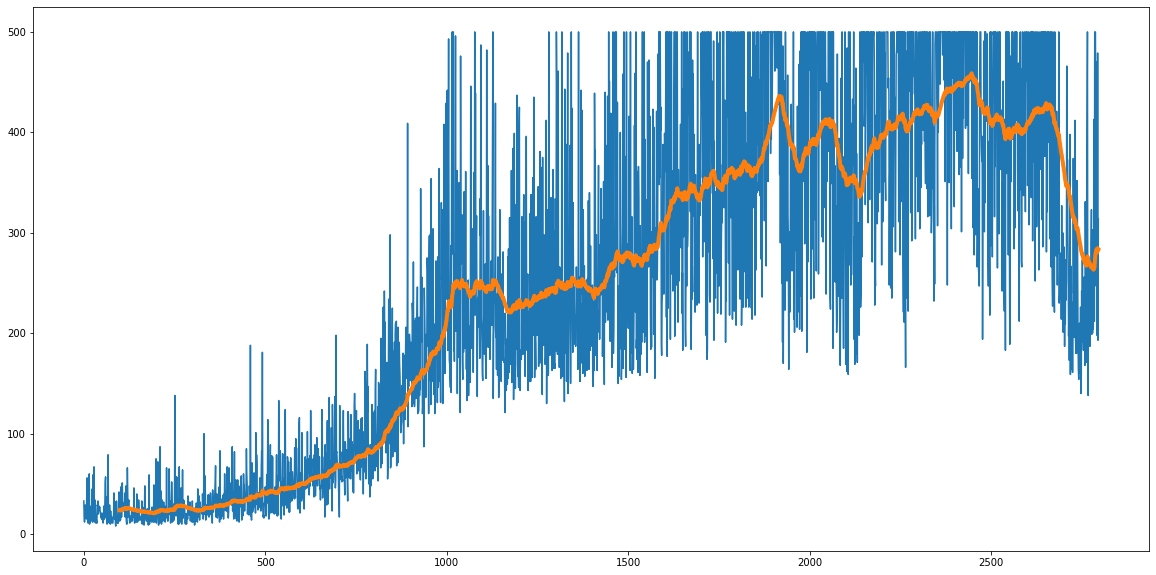

In [141]:
plt.figure(figsize=(20,10))
plt.plot(score_history)
plt.plot(ta.trend.ema_indicator(pd.Series(score_history),100),linewidth=4)

In [84]:
import ta
import pandas as pd

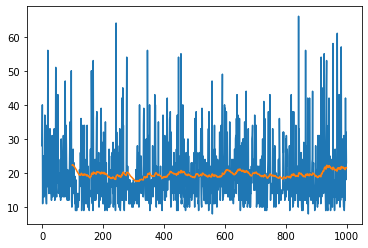

In [137]:
l =[1,2,3,4,5]

In [139]:
l[:-4:-1]

[5, 4, 3]